In [1]:
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from scipy.misc import imresize
import glob
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import compute_class_weight
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


# Load label

In [2]:
def load_label(path):
    label = pd.read_table(path, sep=',', header=None)
    label.columns=['video','jpg', 'interesting', 'level', 'key_frame']
    label = label.groupby(['jpg'], sort=False, as_index=False).max()
    return label

train_label = load_label('devset-image.txt')
test_label = load_label('testset-image.txt')

train_label.head(2)

FileNotFoundError: File b'devset-image.txt' does not exist

# Load image

In [ ]:
# Reduce and convert image to array
def reduce_convert(img):
    array = img_to_array(img)
    reduced = imresize(array, (216,384))
    return reduced

def pic_list(path):
    array_list=[]
    for filename in glob.glob(path): 
        im=load_img(filename)
        reduced = reduce_convert(im)
        array_list.append(reduced)
    return array_list

def flat(list_):
    list_a = []
    for i in list_:
        list_a.append(i.flatten())
    return list_a

In [3]:
train = np.load('train_array.npy')
train_flat = flat(train)

NameError: name 'flat' is not defined

In [ ]:
y = np.array(train_label['interesting'])

# Oversampling to balance classes

In [9]:
kind = ['borderline1', 'borderline2']
sm = [SMOTE(kind=k) for k in kind]
X_resampled = []
y_resampled = []
for method in sm:
    X_res, y_res = method.fit_sample(train_flat[:1000], y[:1000])
    X_resampled.append(X_res)
    y_resampled.append(y_res)

In [10]:
X_resampled[0].shape

(1758, 248832)

In [11]:
x_tr = X_resampled[0].reshape(1758, 216, 384, 3)

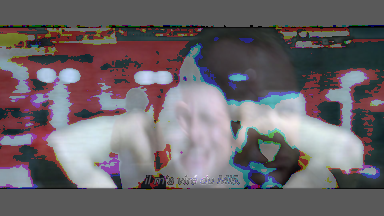

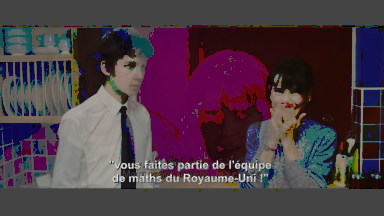

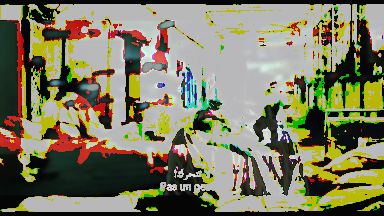

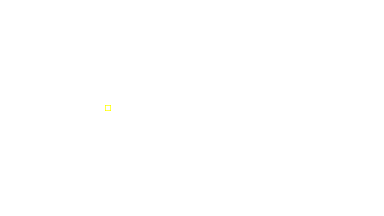

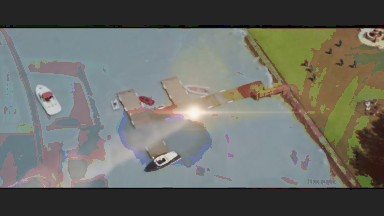

In [12]:
for images in x_tr[1700:1705]:
    display(array_to_img(images)) 

# Fit to a model

In [13]:
from keras.layers import Input, Flatten, Dense
from keras.preprocessing import image
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.models import Model

v3 = InceptionV3(weights='imagenet', include_top=False)

input = Input(shape=(216, 384, 3),name = 'image_input')

output = v3(input)

x = Flatten(name='flatten')(output)
x = Dense(2, activation='sigmoid', name='predictions')(x)

model = Model(input=input, output=x)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     (None, 216, 384, 3)       0         
_________________________________________________________________
inception_v3 (Model)         multiple                  21802784  
_________________________________________________________________
flatten (Flatten)            (None, 102400)            0         
_________________________________________________________________
predictions (Dense)          (None, 2)                 204802    
Total params: 22,007,586.0
Trainable params: 21,973,154.0
Non-trainable params: 34,432.0
_________________________________________________________________


/home/DL/anaconda3/envs/dl/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("im..., outputs=Tensor("pr...)`


In [14]:
from keras.utils.np_utils import to_categorical

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(x_tr, to_categorical(y_resampled[0]), batch_size=100, validation_split=.1, epochs=12)

Train on 1582 samples, validate on 176 samples
Epoch 1/12
1582/1582 [==============================] - 1016s - loss: 6.8019 - acc: 0.5411 - val_loss: 16.0302 - val_acc: 0.0000e+00
Epoch 2/12
1582/1582 [==============================] - 992s - loss: 7.1234 - acc: 0.5556 - val_loss: 16.0302 - val_acc: 0.0000e+00
Epoch 3/12
1582/1582 [==============================] - 998s - loss: 7.1234 - acc: 0.5556 - val_loss: 16.0302 - val_acc: 0.0000e+00
Epoch 4/12
1582/1582 [==============================] - 999s - loss: 7.1234 - acc: 0.5556 - val_loss: 16.0302 - val_acc: 0.0000e+00
Epoch 5/12
1582/1582 [==============================] - 994s - loss: 7.1234 - acc: 0.5556 - val_loss: 16.0302 - val_acc: 0.0000e+00
Epoch 6/12
1582/1582 [==============================] - 1000s - loss: 7.1234 - acc: 0.5556 - val_loss: 16.0302 - val_acc: 0.0000e+00
Epoch 7/12
1582/1582 [==============================] - 1000s - loss: 7.1234 - acc: 0.5556 - val_loss: 16.0302 - val_acc: 0.0000e+00
Epoch 8/12
1582/1582 [====